# Synthesizing Time Series Data

This notebook shows different ways to generate TimeSeries data

## 1. Univariate Time Series

### 1.1 Random time Series in a given range - Using pandas and numpy

In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Generate Time Stamps
date_range_daily = pd.date_range('1/1/2021', '3/30/2021', freq='D')
date_range_hourly = pd.date_range(start='1/1/2021', end='1/08/2021', freq='H')

In [3]:
print('There are {} daily values'.format(len(date_range_daily)))
print('There are {} hourly values'.format(len(date_range_hourly)))

There are 89 daily values
There are 169 hourly values


In [4]:
# Create a dataframe and add random values for the corresponding date
random_ints_d = np.random.randint(0,100,size=(len(date_range_daily)))
random_ints_h = np.random.randint(1,50,size=(len(date_range_hourly)))

df_daily = pd.DataFrame({'data' : random_ints_d}, index=date_range_daily)
df_hourly = pd.DataFrame({'data' : random_ints_h}, index=date_range_hourly)


In [5]:
df_daily.head()

,data
2021-01-01,8
2021-01-02,46
2021-01-03,28
2021-01-04,65
2021-01-05,78


In [6]:
df_hourly.head()

,data
2021-01-01 00:00:00,36
2021-01-01 01:00:00,13
2021-01-01 02:00:00,43
2021-01-01 03:00:00,45
2021-01-01 04:00:00,23


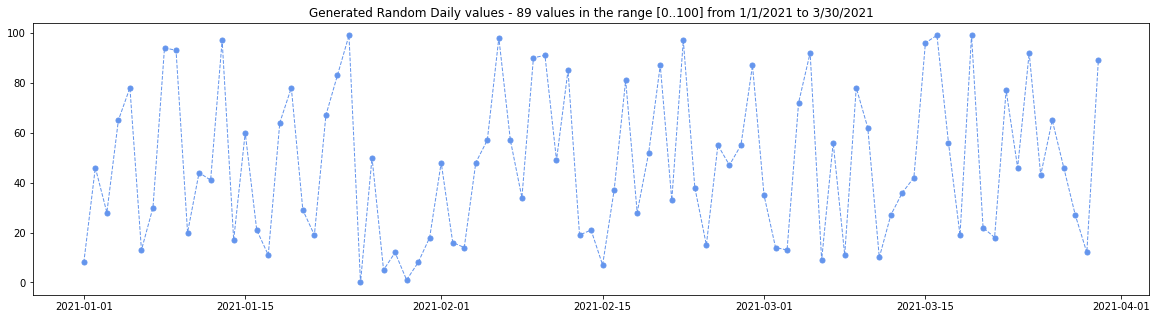

In [7]:
# plot directly with matplotlib pyplot
fig, ax = plt.subplots(figsize=(20,5), edgecolor='k')
plt.plot(df_daily.index, df_daily.data, marker='o', markersize=5, color='cornflowerblue', linewidth=1, linestyle='dashed', label="Time Serie")
plt.title('Generated Random Daily values - 89 values in the range [0..100] from 1/1/2021 to 3/30/2021')
plt.show()


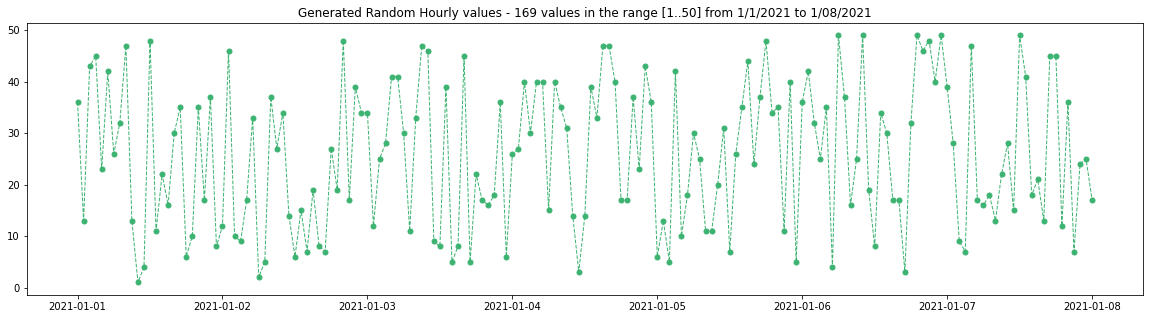

In [8]:
# plot directly with matplotlib pyplot
fig, ax = plt.subplots(figsize=(20,5), edgecolor='k')
plt.plot(df_hourly.index, df_hourly.data, marker='o', markersize=5, color='mediumseagreen', linewidth=1, linestyle='dashed', label="Time Serie")
plt.title('Generated Random Hourly values - 169 values in the range [1..50] from 1/1/2021 to 1/08/2021')
plt.show()


In [9]:
# Query values
# provide values between Jan 1 4:00am and Jan 1 3:00pm
df_hourly[(df_hourly.index >= datetime(2021,1,1,4)) & (df_hourly.index <= datetime(2021,1,1,15))]  


,data
2021-01-01 04:00:00,23
2021-01-01 05:00:00,42
2021-01-01 06:00:00,26
2021-01-01 07:00:00,32
2021-01-01 08:00:00,47
2021-01-01 09:00:00,13
2021-01-01 10:00:00,1
2021-01-01 11:00:00,4
2021-01-01 12:00:00,48
2021-01-01 13:00:00,11


In [10]:
# Query values
# provide values between Jan 2 and Jan 8
df_daily[(df_daily.index >= datetime(2021,1,2)) & (df_daily.index <= datetime(2021,1,8))]  


,data
2021-01-02,46
2021-01-03,28
2021-01-04,65
2021-01-05,78
2021-01-06,13
2021-01-07,30
2021-01-08,94


### 1.2 Random time Series in a given range eith a Shape - Using pandas and numpy
Shapes:
     - cylinder
     - funnel
     - bell
See [Learning Comprehensible Descriptions of Multivariate Time Series](https://www.semanticscholar.org/paper/Learning-Comprehensible-Descriptions-of-Time-Series-Kadous/3190181e9e0e8011e9eb176823e0715ec6fd7226) and [Shapes as diagram figure](https://www.semanticscholar.org/paper/Learning-Comprehensible-Descriptions-of-Time-Series-Kadous/3190181e9e0e8011e9eb176823e0715ec6fd7226/figure/0)


In [11]:
import math
import random

In [12]:
def generate_bell(length, amplitude, default_variance):
    bell = np.random.normal(0, default_variance, length) + amplitude * np.arange(length)/length
    return bell, 'bell'

In [13]:
def generate_funnel(length, amplitude, default_variance):
    funnel = np.random.normal(0, default_variance, length) + amplitude * np.arange(length)[::-1]/length
    return funnel, 'funnel'

In [14]:
def generate_cylinder(length, amplitude, default_variance):
    cylinder = np.random.normal(0, default_variance, length) + amplitude
    return cylinder, 'cylinder'

In [15]:
std_generators = [generate_bell, generate_funnel, generate_cylinder]

In [16]:
def generate_pattern_data(length=100, avg_pattern_length=5, avg_amplitude=1, 
                          default_variance = 1, variance_pattern_length = 10, variance_amplitude = 2, 
                          generator = generate_bell, include_negatives = True):
    shape = 'bell'
    data = np.random.normal(0, default_variance, length)
    current_start = random.randint(0, avg_pattern_length)
    current_length = current_length = max(1, math.ceil(random.gauss(avg_pattern_length, variance_pattern_length)))
    
    while current_start + current_length < length:
        #generator = random.choice(generators)
        current_amplitude = random.gauss(avg_amplitude, variance_amplitude)
        
        while current_length <= 0:
            current_length = -(current_length-1)
        pattern, shape = generator(current_length, current_amplitude, default_variance)
        
        if include_negatives and random.random() > 0.5:
            pattern = -1 * pattern
            
        data[current_start : current_start + current_length] = pattern
        
        current_start = current_start + current_length + random.randint(0, avg_pattern_length)
        current_length = max(1, math.ceil(random.gauss(avg_pattern_length, variance_pattern_length)))
    
    return np.array(data), shape


In [17]:
# Generate Time Series data
n_data= [50, 150, 500]
n_pattern_length = [5,10,50]

In [18]:
from itertools import product
config_ = list(product(n_data, n_pattern_length))

In [19]:
config_

[(50, 5),
 (50, 10),
 (50, 50),
 (150, 5),
 (150, 10),
 (150, 50),
 (500, 5),
 (500, 10),
 (500, 50)]

In [20]:
std_generators[0]

<function __main__.generate_bell(length, amplitude, default_variance)>

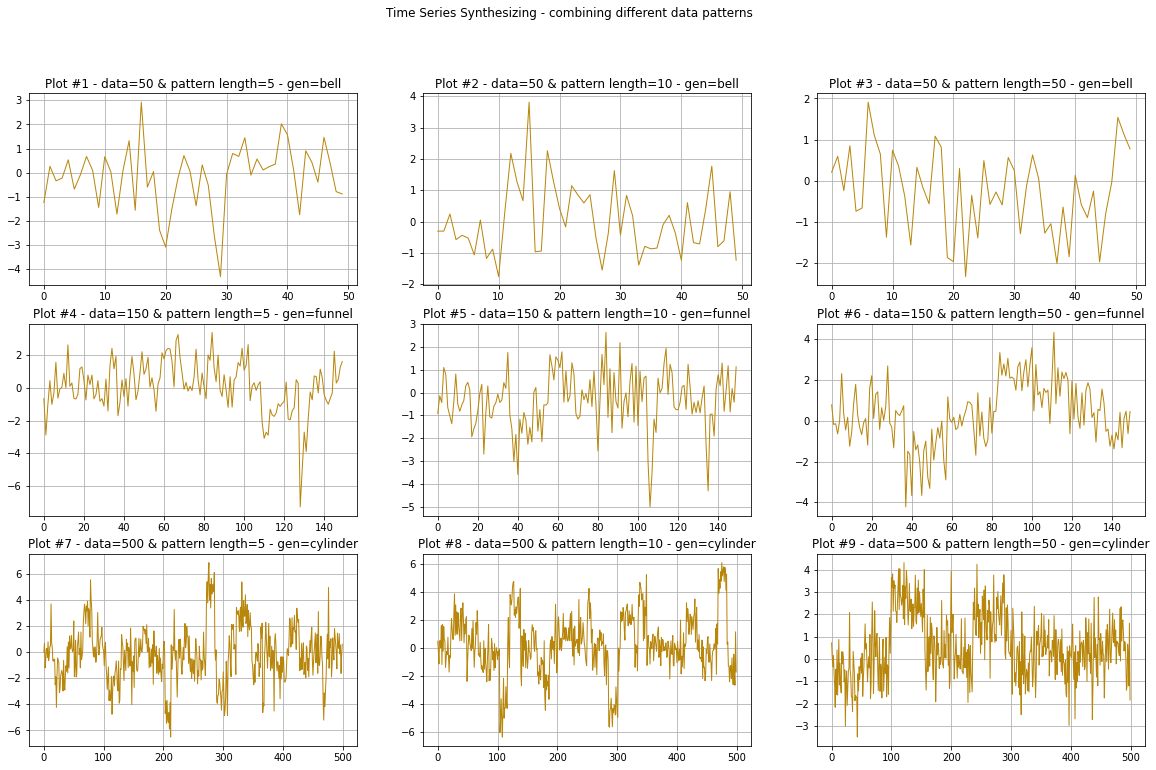

In [28]:
fig, axes = plt.subplots(nrows=3,ncols=3,figsize=(20,12))
ax = axes.ravel()
i=0
j=0
for n1,n2 in config_:
    data, generator = generate_pattern_data(length=n1, avg_pattern_length=n2, generator = std_generators[j])
    ax[i].plot(data, color='darkgoldenrod', linewidth=1)
    ax[i].grid(True)
    ax[i].title.set_text('Plot #{} - data={} & pattern length={} - gen={}'.format(i+1, n1, n2, generator))
    i+=1
    if i%3 ==0: 
        j+=1
fig.suptitle('Time Series Synthesizing - combining different data patterns')
plt.show()

Resources:
 - [Synthesizing time series data](https://nbviewer.jupyter.org/github/tirthajyoti/Machine-Learning-with-Python/blob/master/Synthetic_data_generation/Synth_Time_series.ipynb)